This notebook computes the 2pCF of various catalogs and saves the resutls to a file.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import h5py as hp5
import pandas as pd

In [2]:
# Pylinas core modules
import Pk_library as PKL
import MAS_library as MASL

In [3]:
from matplotlib import colors
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap

# Reading data for Weak and Strong FB

In [4]:
df_w = pd.read_csv('WeakFBL0025N0376_FoF.csv')
df_s = pd.read_csv('StrongFBL0025N0376_FoF.csv')

In [5]:
df_w.columns

Index(['X', 'Y', 'Z', 'Mass'], dtype='object')

In [6]:
mass_w = np.array(df_w['Mass'], dtype=np.float32)/1e10 # in 10^10 Msun
mass_s = np.array(df_s['Mass'], dtype=np.float32)/1e10 # in 10^10 Msun

In [7]:
data_w = np.array([df_w['X'], df_w['Y'], df_w['Z']], dtype=np.float32).T
data_s = np.array([df_s['X'], df_s['Y'], df_s['Z']], dtype=np.float32).T

In [8]:
## computing xi(r)
grid = 350
h = 0.6777 #scale factor
BoxSize = 25/h
verbose = True
# Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos_w = np.array(data_w, dtype=np.float32)
delta_w = np.zeros((grid,grid,grid), dtype=np.float32)
pos_s = np.array(data_s, dtype=np.float32)
delta_s = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field for WeakFBL0025N0376_FoF ")
MASL.MA(pos_w, delta_w, BoxSize, MAS, W=mass_w, verbose=verbose)
delta_w /= np.mean(delta_w, dtype=np.float64);
delta_w -= 1.0
print("Constructing 3D density field for StrongFBL0025N0376_FoF ")
MASL.MA(pos_s, delta_s, BoxSize, MAS, W=mass_s, verbose=verbose)
delta_s /= np.mean(delta_s, dtype=np.float32);
delta_s -= 1.0

# compute the correlation function
print("=====Computing correlation function=====")
axis = 0
threads=10
CF_W     = PKL.Xi(delta_w, BoxSize, MAS, axis, threads) # WeakFBL0025N0376_FoF
CF_S     = PKL.Xi(delta_s, BoxSize, MAS, axis, threads) # StrongFBL0025N0376_FoF



# get the attributes
print("Getting attributes")
# for WeakFBL0025N0376_FoF
W_r      = CF_W.r3D      #radii in Mpc/h
W_xi0    = CF_W.xi[:,0]  #correlation function (monopole)
W_xi2    = CF_W.xi[:,1]  #correlation function (quadrupole)
W_xi4    = CF_W.xi[:,2]  #correlation function (hexadecapole)
W_Nmodes = CF_W.Nmodes3D #number of modes
# for StrongFBL0025N0376_FoF
S_r      = CF_S.r3D      #radii in Mpc/h
S_xi0    = CF_S.xi[:,0]  #correlation function (monopole)
S_xi2    = CF_S.xi[:,1]  #correlation function (quadrupole)
S_xi4    = CF_S.xi[:,2]  #correlation function (hexadecapole)
S_Nmodes = CF_S.Nmodes3D #number of modes

print("\n\nDone!!")

Getting position and delta array
Constructing 3D density field for WeakFBL0025N0376_FoF 

Using CIC mass assignment scheme with weights
Time taken = 0.068 seconds

Constructing 3D density field for StrongFBL0025N0376_FoF 

Using CIC mass assignment scheme with weights
Time taken = 0.038 seconds

=====Computing correlation function=====

Computing correlation function of the field...
Time to complete loop = 0.26
Time taken = 1.42 seconds

Computing correlation function of the field...
Time to complete loop = 0.27
Time taken = 1.41 seconds
Getting attributes


Done!!


In [9]:
#getting only non-nan values for log(xi0)
W_xi0_filtered = W_xi0[~np.isnan(np.log10(W_xi0))]
W_r_filterd    = W_r[~np.isnan(np.log10(W_xi0))]
S_xi0_filtered = S_xi0[~np.isnan(np.log10(S_xi0))]
S_r_filterd    = S_r[~np.isnan(np.log10(S_xi0))]

/tmp/ipykernel_55862/1027223500.py:2: RuntimeWarning: invalid value encountered in log10
  W_xi0_filtered = W_xi0[~np.isnan(np.log10(W_xi0))]
/tmp/ipykernel_55862/1027223500.py:3: RuntimeWarning: invalid value encountered in log10
  W_r_filterd    = W_r[~np.isnan(np.log10(W_xi0))]
/tmp/ipykernel_55862/1027223500.py:4: RuntimeWarning: invalid value encountered in log10
  S_xi0_filtered = S_xi0[~np.isnan(np.log10(S_xi0))]
/tmp/ipykernel_55862/1027223500.py:5: RuntimeWarning: invalid value encountered in log10
  S_r_filterd    = S_r[~np.isnan(np.log10(S_xi0))]


Text(0, 0.5, '$\\xi(r)$')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


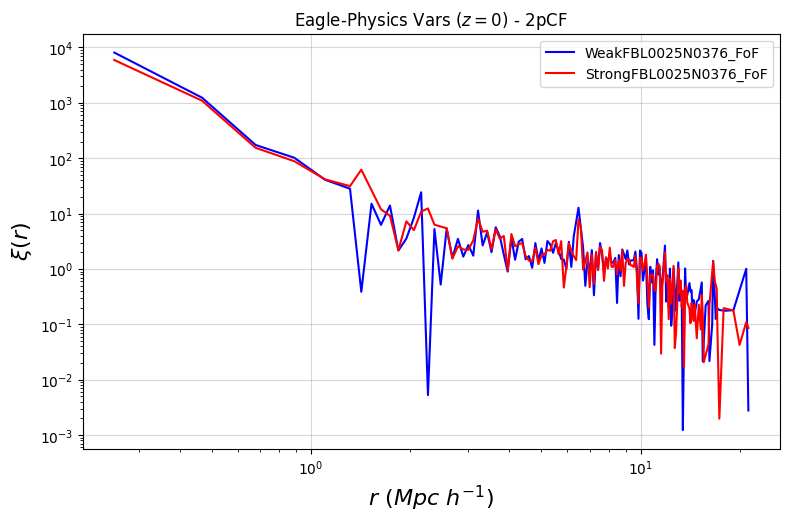

In [10]:
#plotting
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(W_r_filterd,W_xi0_filtered, color='blue', label='WeakFBL0025N0376_FoF')
plt.plot(S_r_filterd,S_xi0_filtered, color='red', label='StrongFBL0025N0376_FoF')
#setting log scale
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.5)

plt.legend()

plt.title('Eagle-Physics Vars ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

# plt.savefig('2pCF_Eagle-StrongFBL0025N0376.jpg', dpi=300, bbox_inches='tight')

In [11]:
del delta_w, delta_s, pos_w, pos_s, W_r, W_xi0, W_xi2, W_xi4, W_Nmodes, S_r, S_xi0, S_xi2, S_xi4, S_Nmodes

In [12]:
# Reading the data for ViscHiL0050N0752_FoF, ViscHiL0050N0752_FoF

df_VL = pd.read_csv('ViscLoL0050N0752_FoF.csv')
df_VH = pd.read_csv('ViscHiL0050N0752_FoF.csv')

In [13]:
mass_VL = np.array(df_w['Mass'], dtype=np.float32)/1e10 # in 10^10 Msun
mass_VH = np.array(df_s['Mass'], dtype=np.float32)/1e10 # in 10^10 Msun

data_VL = np.array([df_VL['X'], df_VL['Y'], df_VL['Z']], dtype=np.float32).T
data_VH = np.array([df_VH['X'], df_VH['Y'], df_VH['Z']], dtype=np.float32).T

In [14]:
## computing xi(r)
grid = 350
h = 0.6777 #scale factor
BoxSize = 50/h
verbose = True
# Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos_VL = np.array(data_VL, dtype=np.float32)
delta_VL = np.zeros((grid,grid,grid), dtype=np.float32)
pos_VH = np.array(data_VH, dtype=np.float32)
delta_VH = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field for ViscLoL0050N0752_FoF ")
MASL.MA(pos_VL, delta_VL, BoxSize, MAS, W=mass_VL, verbose=verbose)
delta_VL /= np.mean(delta_VL, dtype=np.float64);
delta_VL -= 1.0
print("Constructing 3D density field for ViscHiL0050N0752_FoF ")
MASL.MA(pos_VH, delta_VH, BoxSize, MAS, W=mass_VH, verbose=verbose)
delta_VH /= np.mean(delta_VH, dtype=np.float32);
delta_VH -= 1.0

# compute the correlation function
print("======Computing correlation function======")
axis = 0
threads=10
CF_VL     = PKL.Xi(delta_VL, BoxSize, MAS, axis, threads) # ViscLoL0050N0752_FoF
CF_VH     = PKL.Xi(delta_VH, BoxSize, MAS, axis, threads) # ViscHiL0050N0752_FoF


# get the attributes
print("Getting attributes")
# for WeakFBL0025N0376_FoF
VL_r      = CF_VL.r3D      #radii in Mpc/h
VL_xi0    = CF_VL.xi[:,0]  #correlation function (monopole)
VL_xi2    = CF_VL.xi[:,1]  #correlation function (quadrupole)
VL_xi4    = CF_VL.xi[:,2]  #correlation function (hexadecapole)
VL_Nmodes = CF_VL.Nmodes3D #number of modes
# for StrongFBL0025N0376_FoF
VH_r      = CF_VH.r3D      #radii in Mpc/h
VH_xi0    = CF_VH.xi[:,0]  #correlation function (monopole)
VH_xi2    = CF_VH.xi[:,1]  #correlation function (quadrupole)
VH_xi4    = CF_VH.xi[:,2]  #correlation function (hexadecapole)
VH_Nmodes = CF_VH.Nmodes3D #number of modes

print("\n\nDone!!")

Getting position and delta array
Constructing 3D density field for ViscLoL0050N0752_FoF 

Using CIC mass assignment scheme with weights
Time taken = 0.105 seconds

Constructing 3D density field for ViscHiL0050N0752_FoF 

Using CIC mass assignment scheme with weights
Time taken = 0.096 seconds

======Computing correlation function======

Computing correlation function of the field...
Time to complete loop = 0.29
Time taken = 1.47 seconds

Computing correlation function of the field...
Time to complete loop = 0.27
Time taken = 1.43 seconds
Getting attributes


Done!!


In [15]:
#getting only non-nan values for log(xi0)
VL_xi0_filtered = VL_xi0[~np.isnan(np.log10(VL_xi0))]
VL_r_filterd    = VL_r[~np.isnan(np.log10(VL_xi0))]
VH_xi0_filtered = VH_xi0[~np.isnan(np.log10(VH_xi0))]
VH_r_filterd    = VH_r[~np.isnan(np.log10(VH_xi0))]

/tmp/ipykernel_55862/4070400885.py:2: RuntimeWarning: invalid value encountered in log10
  VL_xi0_filtered = VL_xi0[~np.isnan(np.log10(VL_xi0))]
/tmp/ipykernel_55862/4070400885.py:3: RuntimeWarning: invalid value encountered in log10
  VL_r_filterd    = VL_r[~np.isnan(np.log10(VL_xi0))]
/tmp/ipykernel_55862/4070400885.py:4: RuntimeWarning: invalid value encountered in log10
  VH_xi0_filtered = VH_xi0[~np.isnan(np.log10(VH_xi0))]
/tmp/ipykernel_55862/4070400885.py:5: RuntimeWarning: invalid value encountered in log10
  VH_r_filterd    = VH_r[~np.isnan(np.log10(VH_xi0))]


Text(0, 0.5, '$\\xi(r)$')

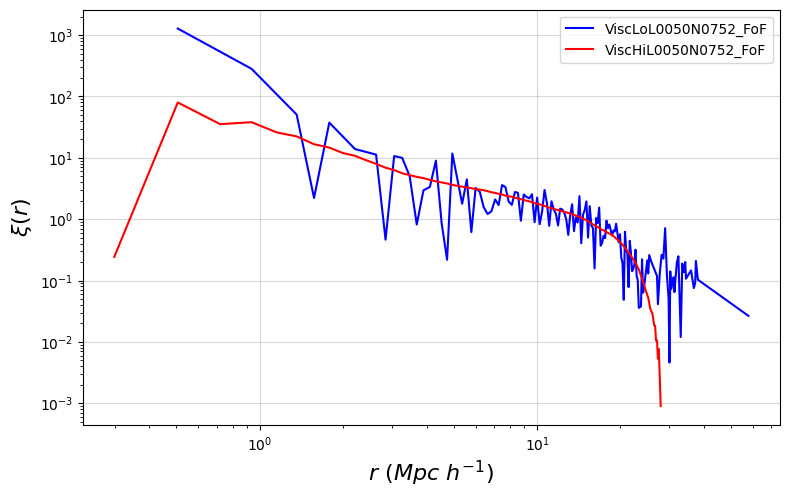

In [16]:
#plotting
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(VL_r_filterd,VL_xi0_filtered, color='blue', label='ViscLoL0050N0752_FoF')
plt.plot(VH_r_filterd,VH_xi0_filtered, color='red', label='ViscHiL0050N0752_FoF')
#setting log scale
plt.xscale('log')
plt.yscale('log')

plt.grid(alpha=0.5)
plt.legend()

plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

In [17]:
del data_VL, data_VH, delta_VL, delta_VH, pos_VL, pos_VH, mass_VL, mass_VH, df_VL, df_VH

In [18]:
# reading the data for RefL0100N1504_FOF
df = pd.read_csv('RefL0100N1504_FOF.csv')
df.columns

Index(['X', 'Y', 'Z', 'Mass'], dtype='object')

In [19]:
data = np.array([df['X'], df['Y'], df['Z']], dtype=np.float32).T
mass = np.array(df['Mass'], dtype=np.float32)

In [20]:
print('FoF Halos:',len(data))
print('DM Particles:', 1504**3)

FoF Halos: 1885062
DM Particles: 3402072064


In [21]:
## computing xi(r)
grid = 512
h = 0.6777 #scale factor
BoxSize = 100/h
verbose = True
# Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos = np.array(data, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field")
MASL.MA(pos, delta, BoxSize, MAS,W=mass, verbose=verbose)
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0

# compute the correlation function
print("Computing correlation function")
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


# get the attributes
print("Getting attributes")
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes

print("\n\nDone!!")

Getting position and delta array
Constructing 3D density field

Using CIC mass assignment scheme with weights
Time taken = 0.370 seconds

Computing correlation function

Computing correlation function of the field...
Time to complete loop = 0.82
Time taken = 4.72 seconds
Getting attributes


Done!!


In [22]:
#getting only non-nan values for log(xi0)
xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
r_filterd = r[~np.isnan(np.log10(xi0))]

/tmp/ipykernel_55862/3522207347.py:2: RuntimeWarning: invalid value encountered in log10
  xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
/tmp/ipykernel_55862/3522207347.py:3: RuntimeWarning: invalid value encountered in log10
  r_filterd = r[~np.isnan(np.log10(xi0))]


Plotting


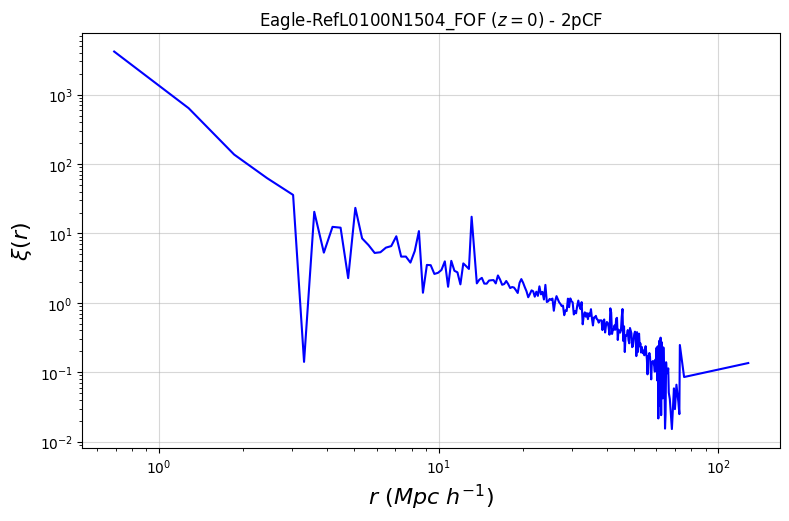

In [23]:
# log-log plot
print("Plotting")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(r_filterd,xi0_filtered, color='blue')
#setting log scale
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0.1, 10)
plt.grid(alpha=0.5)

plt.title('Eagle-RefL0100N1504_FOF ($z=0$) - 2pCF')

plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16);
plt.ylabel("$\\xi(r)$", fontsize=16);


Text(0.5, 1.0, 'Distribution of FoF Halos in RefL0100N1504')

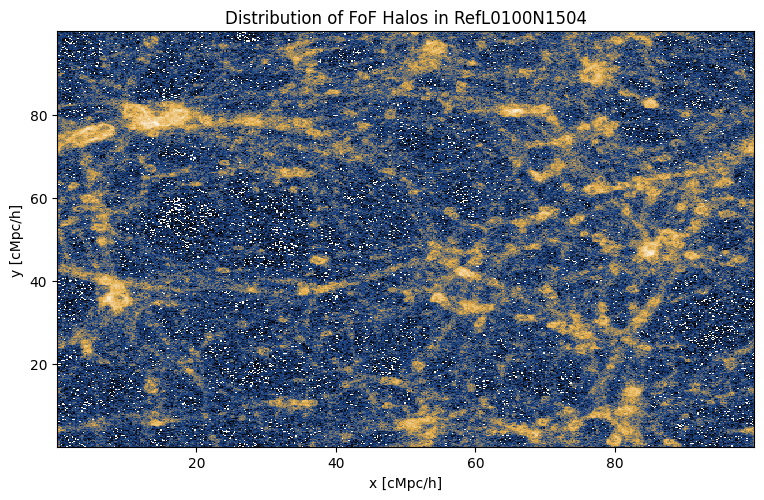

In [24]:
# creating colormap for plotting
new_cmap = build_custom_continuous_cmap([9,9,14], [28, 70, 138], [227, 172, 70], [255,255,255])
plt.figure(figsize=(9,5.5), dpi=100)
plt.hist2d(data[:,0], data[:,1], norm =colors.LogNorm(), cmap=new_cmap, bins=512);
plt.xlabel('x [cMpc/h]')
plt.ylabel('y [cMpc/h]')

plt.title('Distribution of FoF Halos in RefL0100N1504')

In [25]:
h5f = hp5.File('FinalProducts/2pCF_Eagle.hdf5', 'a')
h5f.keys()

<KeysViewHDF5 ['StrongFB', 'WeakFB']>

In [26]:
# creating a group
grp1 = h5f.create_group("ViscLo/fof")
grp2 = h5f.create_group("ViscHi/fof")
grp3 = h5f.create_group("RefL0100N1504/fof")
grp4 = h5f.create_group("StrongFB/fof")
grp5 = h5f.create_group("WeakFB/fof")

In [27]:
dset = grp1.create_dataset("xi0", data=VL_xi0_filtered)
dset = grp1.create_dataset("r", data=VL_r_filterd)
dset = grp2.create_dataset("xi0", data=VH_xi0_filtered)
dset = grp2.create_dataset("r", data=VH_r_filterd)
dset = grp3.create_dataset("xi0", data=xi0_filtered)
dset = grp3.create_dataset("r", data=r_filterd)
dset = grp4.create_dataset("xi0", data=S_xi0_filtered)
dset = grp4.create_dataset("r", data=S_r_filterd)
dset = grp5.create_dataset("xi0", data=W_xi0_filtered)
dset = grp5.create_dataset("r", data=W_r_filterd)

In [28]:
h5f.close()

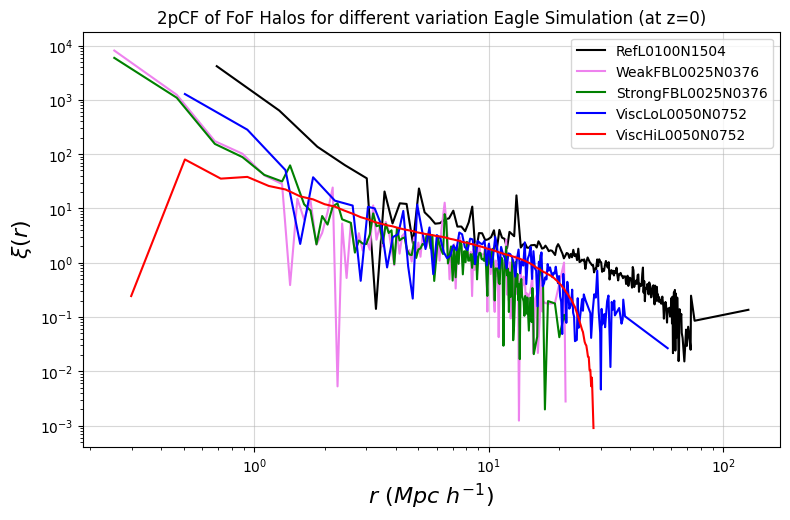

In [29]:
# plotting all the fof 2pCF
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(r_filterd,xi0_filtered, color='black', label='RefL0100N1504')
plt.plot(W_r_filterd,W_xi0_filtered, color='violet', label='WeakFBL0025N0376')
plt.plot(S_r_filterd,S_xi0_filtered, color='green', label='StrongFBL0025N0376')
plt.plot(VL_r_filterd,VL_xi0_filtered, color='blue', label='ViscLoL0050N0752')
plt.plot(VH_r_filterd,VH_xi0_filtered, color='red', label='ViscHiL0050N0752')

#setting log scale
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(alpha=0.5)

plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16);
plt.ylabel("$\\xi(r)$", fontsize=16);
plt.title('2pCF of FoF Halos for different variation Eagle Simulation (at z=0)')

plt.savefig('FinalProducts/2pCF_Eagle_FoF.jpg', dpi=300, bbox_inches='tight')